In [2]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [52]:
corrs = [
    0.9551,
    0.9546,
    0.9429,
    0.9176,
    0.8154,
    0.7053,
    0.7243,
    0.6039,
    0.4716,
    0.4416,
    0.3455
]

mses = [
    0.0065,
    0.0069,
    0.0074,
    0.0084,
    0.0131,
    0.0180,
    0.0176,
    0.0245,
    0.0418,
    0.0398,
    0.0636
]

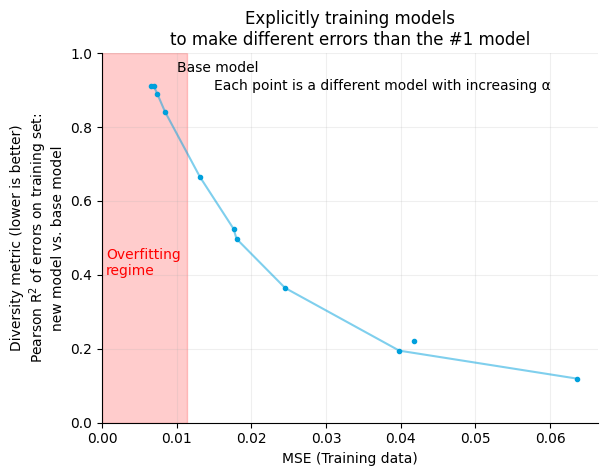

In [53]:
import numpy as np

mses = np.array(mses)
corrs = np.array(corrs)**2

def is_dominated(point_idx, mses, corrs):
    current_mse = mses[point_idx]
    current_corr = corrs[point_idx]
    
    return any((mses < current_mse) & (corrs < current_corr))

pareto_indices = [i for i in range(len(mses)) if not is_dominated(i, mses, corrs)]

pareto_indices = sorted(pareto_indices, key=lambda i: mses[i])

plt.plot(mses, corrs, '.', color='#00a0dc', label='All points')
plt.plot(mses[pareto_indices], corrs[pareto_indices], '-', color='#00a0dc', alpha=0.5)

sns.despine()
plt.grid(alpha=0.2)
plt.xlabel('MSE (Training data)')
plt.ylabel('Diversity metric (lower is better)\nPearson R$^2$ of errors on training set:\nnew model vs. base model')
plt.title('Explicitly training models\nto make different errors than the #1 model')

plt.text(0.01, 0.95, 'Base model')
plt.text(0.015, 0.90, 'Each point is a different model with increasing α')
plt.text(0.0005, 0.4, 'Overfitting\nregime', color = 'red')

plt.ylim(bottom = 0, top = 1)
plt.xlim(left = 0)
plt.axvspan(0, 0.0114, color = 'red', alpha = 0.2)

plt.savefig('plot-diverse-pareto.png')